Kaggle link : https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning
This is a multiclass classification dataset

In [1]:
iopub_data_rate_limit=2000000.0 

Index(['fluid_overload'], dtype='object')


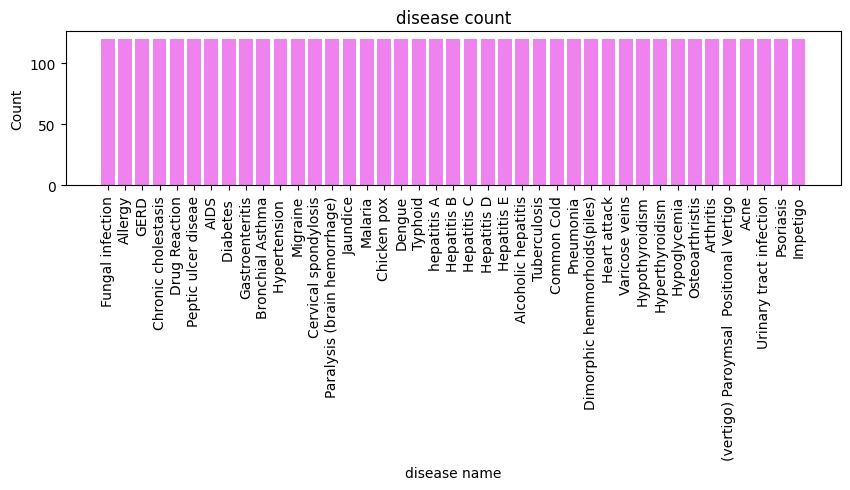

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 140)
pd.set_option('display.max_rows', 5000)
disease_prediction_details = pd.read_csv('/Users/amulya/Downloads/DiseasePrediction/Training.csv')
# print(disease_prediction_details.head())
# disease_prediction_details.describe()
# to print any column is having single values drop those columns
unwanted_columns= disease_prediction_details.columns[disease_prediction_details.nunique() == 1]
print(unwanted_columns)
disease_prediction_details = disease_prediction_details.drop(unwanted_columns,axis=1)
disease_prediction_details = disease_prediction_details.drop('Unnamed: 133', axis=1)
# to count null values
# print(disease_prediction_details.columns)
null_values = disease_prediction_details.isna().sum()
# output = disease_prediction_details['prognosis']
# print(null_values)
# disease_prediction_details.dtypes
disease_names = disease_prediction_details['prognosis'].unique()
# print(disease_names.sum())
count = disease_prediction_details['prognosis'].value_counts()
# print(count)
plt.figure(figsize=(10,2))
plt.bar(disease_names, count, color = 'violet')
plt.ylabel('Count') 
plt.xlabel('disease name')
plt.xticks(rotation=90)
plt.title('disease count')
plt.legend
plt.show()



observation :  as the data is equally distributed we can say this dataset is balanced or unbiased dataset and there are no null values in this dataset

In [3]:
disease_prediction_details.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
a = disease_prediction_details.shape
print(a)

(4920, 132)


In [5]:
symptom_cols = disease_prediction_details.columns[disease_prediction_details.columns != 'prognosis']
num_symptoms = len(symptom_cols)
single_disease_symptoms = []
# max_disease_count = None
max_disease_counts_length = 0
for i, col in enumerate(symptom_cols):
    symptom_data = disease_prediction_details[disease_prediction_details[col] == 1]
    disease_counts = disease_prediction_details['prognosis'].value_counts()
    if len(disease_counts) == 1:
        single_disease_symptoms.append(col)
    max_disease_counts_length = max(max_disease_counts_length, len(disease_counts))
print(len(single_disease_symptoms))
print(single_disease_symptoms)
print(max_disease_counts_length)
disease_dataset = disease_prediction_details.drop(single_disease_symptoms, axis = 1)
# print(disease_dataset.columns)
print(disease_dataset.info())

0
[]
41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, itching to prognosis
dtypes: int64(131), object(1)
memory usage: 5.0+ MB
None


In [6]:
disease_prediction_details['prognosis']

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
5                              Fungal infection
6                              Fungal infection
7                              Fungal infection
8                              Fungal infection
9                              Fungal infection
10                                      Allergy
11                                      Allergy
12                                      Allergy
13                                      Allergy
14                                      Allergy
15                                      Allergy
16                                      Allergy
17                                      Allergy
18                                      Allergy
19                                      Allergy
20                                      

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(disease_prediction_details['prognosis'])
x = disease_prediction_details.drop(['prognosis'], axis=1)


# Step 3: Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.3, random_state=42)

# Step 4: Initialize and train the RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(x_test)
print(y_pred)
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')
# accuracy_test = accuracy_score(y_train,y_pred)

[ 2  2 24 ... 30 26 11]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [8]:
y_train_pred = model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(accuracy_train)

1.0


observation : I am removing 80 symptoms that directly influence the 'prognosis' column because the presence of these symptoms unequivocally indicates the occurrence of a specific disease.
Q : further what can I analyze?